In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('chained_assignment', None)
pd.set_option('display.max_columns', 100)
import seaborn as sns

In [2]:
df = pd.read_csv('./DSCW3/final.csv',)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
len(df.columns)

22

In [4]:
# Data-Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   record        3485 non-null   int64  
 1   estab_numb    3485 non-null   float64
 2   urn           3485 non-null   int64  
 3   school_name   3485 non-null   object 
 4   town          3485 non-null   object 
 5   postcode      3485 non-null   object 
 6   school_type1  3485 non-null   object 
 7   religion      3485 non-null   object 
 8   gender        3485 non-null   object 
 9   total_pupils  3485 non-null   float64
 10  disadvantage  3485 non-null   float64
 11  eal           3485 non-null   float64
 12  att8_score    3485 non-null   float64
 13  att8_ebacc    3485 non-null   float64
 14  la_name       3485 non-null   object 
 15  la_code       3485 non-null   int64  
 16  status        3485 non-null   object 
 17  school_type2  3485 non-null   object 
 18  school_type3  3485 non-null 

In [6]:
# Data-Distribution
df.describe().round(2)

,record,estab_numb,urn,total_pupils,disadvantage,eal,att8_score,att8_ebacc,la_code,sen,fsm,per_abs
count,3485.0,3485.00,3485.00,3485.00,3485.00,3485.00,3485.00,3485.00,3485.00,3485.00,3485.00,3485.00
mean,1.1,4837.86,131899.63,926.92,39.73,24.63,42.95,12.34,675.09,28.29,134.16,6.47
std,0.3,1081.08,12773.70,460.27,27.18,36.63,15.36,4.80,270.49,42.76,99.89,3.98
min,1.0,2006.00,100049.00,18.00,0.00,0.00,0.00,0.00,202.00,0.00,1.00,1.80
25%,1.0,4026.00,125458.00,629.00,19.00,3.00,39.50,10.90,352.00,8.00,61.00,4.80
50%,1.0,4226.00,137090.00,934.00,35.00,9.00,45.10,12.90,840.00,15.00,108.00,5.60
75%,1.0,5406.00,139655.00,1234.00,54.00,29.00,50.80,14.80,888.00,27.00,182.00,6.70
max,2.0,7511.00,146624.00,2953.00,194.00,258.00,85.20,26.30,938.00,405.00,919.00,49.60


In [7]:
# Sample Data
df.sample(5)

,record,estab_numb,urn,school_name,town,postcode,school_type1,religion,gender,total_pupils,disadvantage,eal,att8_score,att8_ebacc,la_name,la_code,status,school_type2,school_type3,sen,fsm,per_abs
185,1,4000.0,139410,St Andrew the Apostle Greek Orthodox School,London,N11 1NP,F,Greek Orthodox,MIXED,670.0,14.0,18.0,51.3,15.5,Barnet,302,Open,Academy,Free schools,7.0,65.0,5.9
984,1,4026.0,106528,Hindley High School,Wigan,WN2 4LG,FD,None,MIXED,908.0,56.0,3.0,42.1,12.2,Wigan,359,Open,Maintained school,Foundation school,13.0,151.0,5.4
1506,1,4702.0,121720,All Saints RC School,York,YO24 1BJ,VA,Roman Catholic,MIXED,1335.0,24.0,22.0,51.6,15.4,York,816,"Open, but proposed to close",Maintained school,Voluntary aided school,16.0,69.0,5.9
3355,1,4058.0,125249,Broadwater School,Godalming,GU7 3BW,CY,Does not apply,MIXED,534.0,15.0,6.0,50.1,14.6,Surrey,936,Closed,Maintained school,Community school,40.0,75.0,6.8
601,1,4007.0,141992,Cardinal Wiseman Catholic School,Coventry,CV2 2AJ,AC,Roman Catholic,MIXED,1212.0,57.0,59.0,38.9,11.1,Coventry,331,Open,Academy,Academy sponsor led,7.0,287.0,6.7


### Numerical Data Profiling

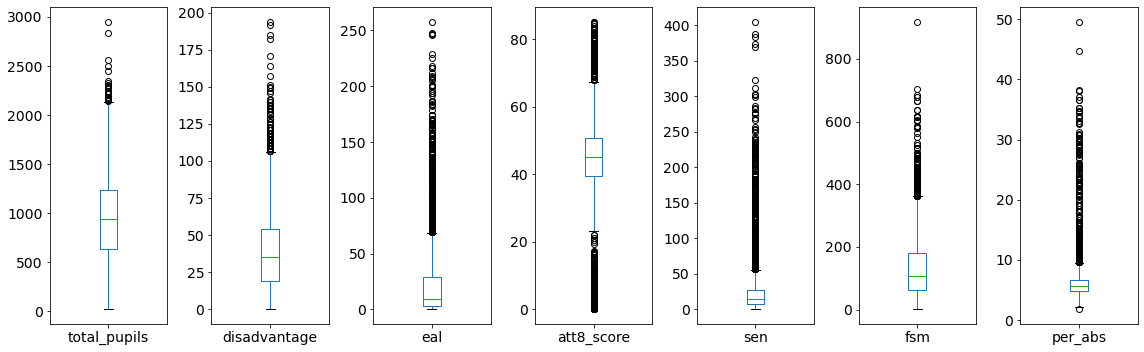

In [80]:
# Outlier detection using box-plot
df[['total_pupils', 'disadvantage', 'eal', 'att8_score', 'sen', 'fsm', 'per_abs']].plot(kind='box', subplots=True, figsize=(16,5), fontsize=14)
plt.tight_layout()

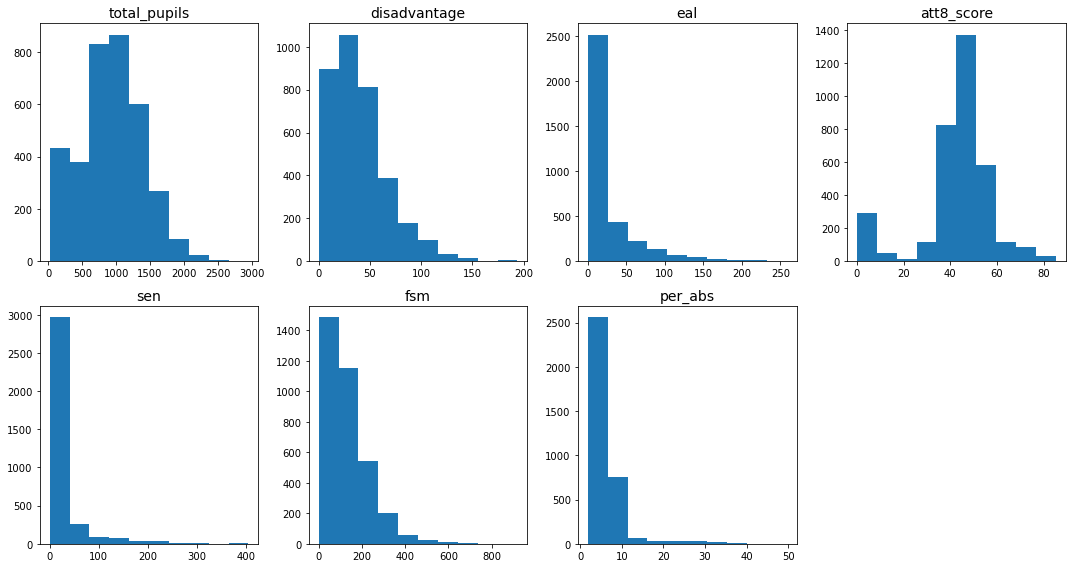

In [90]:
# Each variable/column distribution plot
ndf = df[['total_pupils', 'disadvantage', 'eal', 'att8_score', 'sen', 'fsm', 'per_abs']]

font_size = 14

fig, ((ax11, ax12, ax13, ax14), (ax21, ax22, ax23, ax24)) = plt.subplots(2, 4, figsize=(15,8))

# fig.suptitle('Distribution of Variables')

ax11.hist(ndf['total_pupils'])
ax11.set_title('total_pupils', fontsize=font_size)

ax12.hist(ndf['disadvantage'])
ax12.set_title('disadvantage', fontsize=font_size)

ax13.hist(ndf['eal'])
ax13.set_title('eal', fontsize=font_size)

ax14.hist(ndf['att8_score'])
ax14.set_title('att8_score', fontsize=font_size)

# ax21.hist(ndf['att8_ebacc'])
# ax21.set_title('att8_ebacc')

ax21.hist(ndf['sen'])
ax21.set_title('sen', fontsize=font_size)

ax22.hist(ndf['fsm'])
ax22.set_title('fsm', fontsize=font_size)

ax23.hist(ndf['per_abs'])
ax23.set_title('per_abs', fontsize=font_size)

ax24.remove()

fig.tight_layout()

<AxesSubplot:>

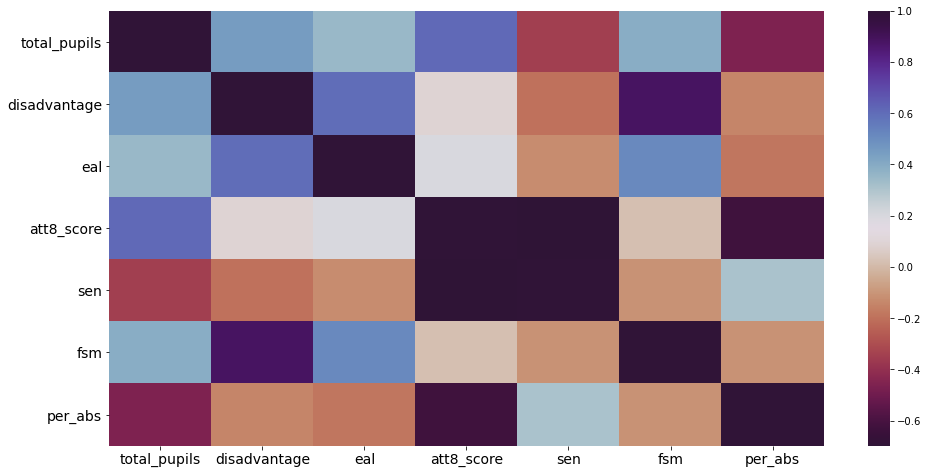

In [70]:
## Correlation Map of Numerical Data
corr = ndf.corr()
plt.figure(figsize=(16,8))
plt.tick_params(axis='both', labelsize=14)
sns.heatmap(corr, cmap='twilight_shifted_r')
# plt.title('Correlation Map of Numerical Data')

### Categorical Data Profiling

In [71]:
import plotly.express as px
import plotly.graph_objects as go

In [72]:
## Distribution of School Type1 column

data = df['school_type1'].value_counts()
labels = data.index.tolist()
values = data.tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(dict(title='<b>School Type 1</b> Pie Chart'))
fig.show()

In [73]:
## Distribution of School Type2 column

data = df['school_type2'].value_counts()
labels = data.index.tolist()
values = data.tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(dict(title='<b>School Type 2</b> Pie Chart'))
fig.show()

In [74]:
## Distribution of School Type3 column

data = df['school_type3'].value_counts()
labels = data.index.tolist()
values = data.tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(dict(title='<b>School Type 3</b> Pie Chart'))
fig.show()

In [75]:
# Histogram for gender column

fig = px.histogram(df, x="gender", title='Distribution of <b style="color:orangered">Gender</b> Column', color_discrete_sequence=['orangered'])
fig.show()

In [76]:
# Histogram for la_name column

fig = px.histogram(df, x="la_name", title='Data Distribution of <b>la_name</b> Column', color_discrete_sequence=['orange'])
fig.show()

In [77]:
# Histogram for town column

fig = px.histogram(df, x="town", title='Data Distribution of <b>town</b> Column', color_discrete_sequence=['orange'])
fig.show()

In [88]:
# plotly -> 4.14.3
# seaborn -> 0.11.1
# matplotlib -> 3.3.2